# Kronecker Product Singular Value Decomposition (KPSVD)

In [1]:
import numpy as np
from numpy import kron
from numpy.linalg import svd, norm, matrix_rank
from numpy.random import randn, rand
import time

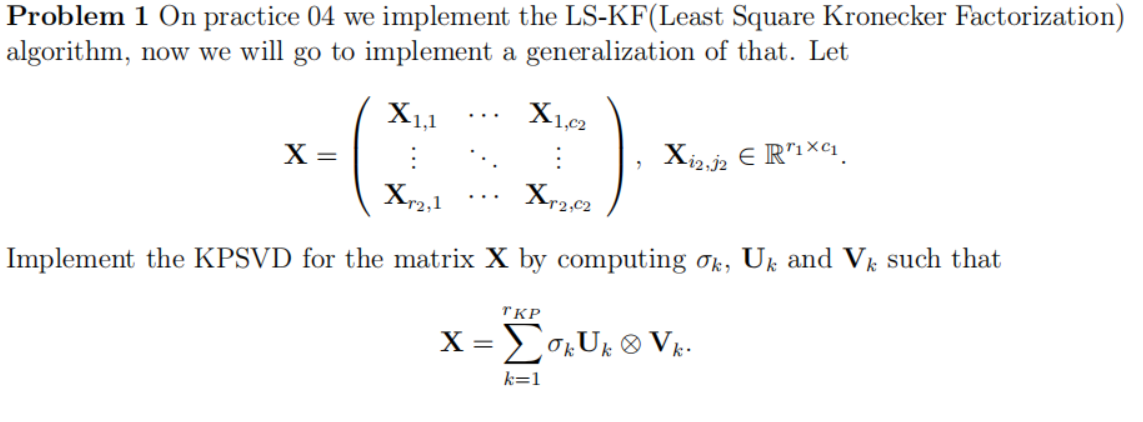

In [2]:
def X_tilde_reshape(X, h_splits, v_splits):
    '''
    This method reshapes an A_kron_B matrix 
    into a vec(A)vec(B)^T shaped matrix        
    _________________________________________
    Inputs:
        X: Matrix to be reshaped
        h_splits: Number of horizontal splits
        v_splits: Number of vertical splits
    _________________________________________
    Outputs:
        X_til: X reshaped as vec(A)vec(B)^T
    '''
    
    X_til = []

    for n_matrix in np.hsplit(X, h_splits):
        for a_B in np.vsplit(n_matrix, v_splits):
            X_til.append(a_B.T.reshape(1, -1)[0])

    X_til = np.array(X_til).T
    
    return X_til

In [3]:
def KPSVD(X, r1, c1, k):
    '''
    Calculates the Kronecker Product 
    Singular Value Decompositon
    ____________________________________________
    Inputs:
        X: Input matrix
        r1: Number of rows of KP block matrix
        c1: Number of columns of KP block matrix
        k: Desired rank of output
    ____________________________________________
    Outputs:
        result: Resulting matrix made up of
            Sigma*kron(U, Vh)
            
    '''
    v_splits = int(X.shape[0]/r1)
    h_splits = int(X.shape[1]/c1)
    X_til = X_tilde_reshape(X, h_splits, v_splits)
    
    U, S, Vh = svd(X_til)
    
    R1_matrices = []
    
    for i in range(k):
        R1_matrices.append(
            S[i]*kron(Vh[i, :].reshape(h_splits, v_splits).T, U[:, i].reshape(c1, r1).T)
        )
        
    result = np.sum(np.array(R1_matrices), axis=0)
    
    return result
  

In [4]:
np.random.seed(0) # set a seed so that random matrices fixed

r2, c2 = 3, 3
r1, c1 = 3, 3

A = randn(r2, c2)
B = randn(r1, c1)

X = kron(A, B)

norm(X - KPSVD(X, r1, c1, 1))

1.9789553278992924e-15

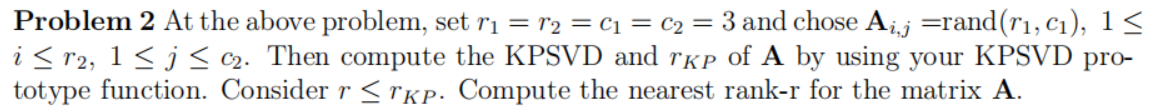

In [9]:
np.random.seed(0) # set a seed so that random matrices fixed

r2, c2 = 3, 3
r1, c1 = 3, 3

A = randn(r1*r2, c1*c2)
R_kp = matrix_rank(X_tilde_reshape(A, c2, r2))

errors = []
for i in range(1, R_kp+1):
    errors.append(norm(A - KPSVD(A, r1, c1, i))**2)

In [14]:
import plotly.graph_objects as go

fig = go.Figure(
    layout=go.Layout(
        template="simple_white"))

fig.add_trace(go.Bar(x=[i for i in range(1, R_kp+1)], y=errors))

fig.update_yaxes(title='Squared Error',showgrid=True)
fig.update_xaxes(title='rank-r')

fig.show()